<a href="https://colab.research.google.com/github/CHANDMX20/ML/blob/main/Linear_regression_multi_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Multiple Variables

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
data2 = pd.read_csv('ex1data2.csv', header=None, names=['Size', 'Bedrooms', 'Price'], skiprows=1)
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
#feature normalization
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
#creating appropriate matrices for performing linear regression
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [5]:
#create a computeCost function to compute the cost function
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)  #matrix multiplication of elements of X with the transpose of theta
    return np.sum(inner) / (2 * len(X))  #sum of inner squared errors/2m

In [6]:
computeCost(X2,y2, theta2)

0.4893617021276595

In [7]:
#creating gradient descent function which is the same for both linear regression in one variable and multi variables

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [8]:
alpha = 0.01
iters = 1500

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[-1.10845139e-16,  8.84042349e-01, -5.24551809e-02]])

In [9]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.130686706060959

Text(0.5, 1.0, 'Error vs. Training Epoch')

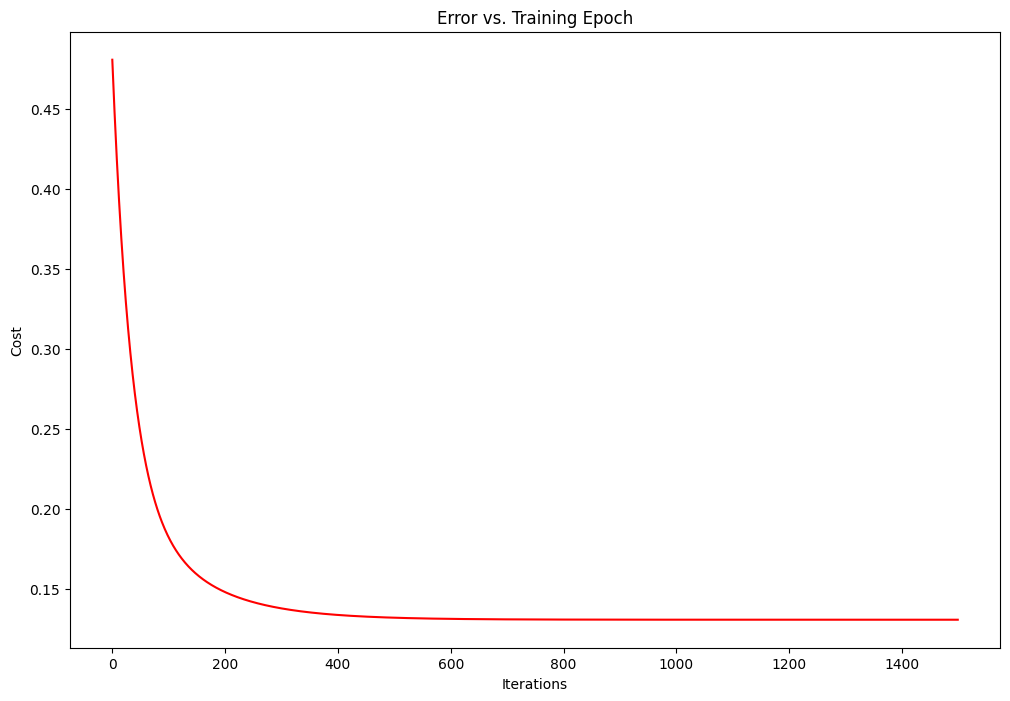

In [10]:
# cost (error) is plotted against iterations to visualize a trend. The cost is decreasing with increasing number of iterations which shows that the gradient descent was calculated properly
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')